<a href="https://colab.research.google.com/github/stonewallmhk/QuantMindi/blob/main/ModernPortfolioTheory_Optimize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install yahoo finance
!pip install yfinance

In [2]:
# Import libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

In [3]:
# on average there are 252 trading days in a year
NUM_TRADING_DAYS = 252

NUM_PORTFOLIOS = 10000

# stocks to handle
stock_list =  ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META', 'TSM', 'TCEHY', 'AVGO']

# Historical data
start_date = '2013-06-01'
end_date = '2023-06-01'

In [4]:
# Generate a list of 4 stocks using different combinations from the total of 10
from itertools import combinations

r = 4 # This is the number of stocks per portfolio

stock_portfolio = list(combinations(stock_list, r))
print(len(stock_portfolio))
print(stock_portfolio)

210
[('AAPL', 'MSFT', 'GOOG', 'AMZN'), ('AAPL', 'MSFT', 'GOOG', 'NVDA'), ('AAPL', 'MSFT', 'GOOG', 'TSLA'), ('AAPL', 'MSFT', 'GOOG', 'META'), ('AAPL', 'MSFT', 'GOOG', 'TSM'), ('AAPL', 'MSFT', 'GOOG', 'TCEHY'), ('AAPL', 'MSFT', 'GOOG', 'AVGO'), ('AAPL', 'MSFT', 'AMZN', 'NVDA'), ('AAPL', 'MSFT', 'AMZN', 'TSLA'), ('AAPL', 'MSFT', 'AMZN', 'META'), ('AAPL', 'MSFT', 'AMZN', 'TSM'), ('AAPL', 'MSFT', 'AMZN', 'TCEHY'), ('AAPL', 'MSFT', 'AMZN', 'AVGO'), ('AAPL', 'MSFT', 'NVDA', 'TSLA'), ('AAPL', 'MSFT', 'NVDA', 'META'), ('AAPL', 'MSFT', 'NVDA', 'TSM'), ('AAPL', 'MSFT', 'NVDA', 'TCEHY'), ('AAPL', 'MSFT', 'NVDA', 'AVGO'), ('AAPL', 'MSFT', 'TSLA', 'META'), ('AAPL', 'MSFT', 'TSLA', 'TSM'), ('AAPL', 'MSFT', 'TSLA', 'TCEHY'), ('AAPL', 'MSFT', 'TSLA', 'AVGO'), ('AAPL', 'MSFT', 'META', 'TSM'), ('AAPL', 'MSFT', 'META', 'TCEHY'), ('AAPL', 'MSFT', 'META', 'AVGO'), ('AAPL', 'MSFT', 'TSM', 'TCEHY'), ('AAPL', 'MSFT', 'TSM', 'AVGO'), ('AAPL', 'MSFT', 'TCEHY', 'AVGO'), ('AAPL', 'GOOG', 'AMZN', 'NVDA'), ('AAPL', 

In [6]:
# Download data

stock_data = {}
for stock in stock_list:
  stock_data[stock] = yf.download(stock, start=start_date, end=end_date)['Adj Close']

stock_data = pd.DataFrame(stock_data)
stock_data.head()

,AAPL,MSFT,GOOG,AMZN,NVDA,TSLA,META,TSM,TCEHY,AVGO
Date,,,,,,,,,,
2013-06-03,13.975492,29.657707,21.609751,13.3440,3.373372,6.172667,23.850000,13.794108,7.250212,28.185244
2013-06-04,13.931773,29.157707,21.397299,13.2850,3.378041,6.322667,23.520000,13.963680,7.185725,28.563068
2013-06-05,13.801541,28.982718,21.412243,13.3585,3.305671,6.358000,22.900000,13.757246,7.069647,27.958555
2013-06-06,13.595345,29.132719,21.535280,13.3915,3.326682,6.490000,22.969999,13.713013,7.167299,27.769650
2013-06-07,13.699221,29.724375,21.911121,13.8435,3.373372,6.802667,23.290001,13.779364,7.115709,28.177687


In [74]:
# Split the data for train and test

stock_train = stock_data[stock_data.index < '2018-06-01'].copy()
print(stock_train.index.max())

2018-05-31 00:00:00


In [75]:
def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

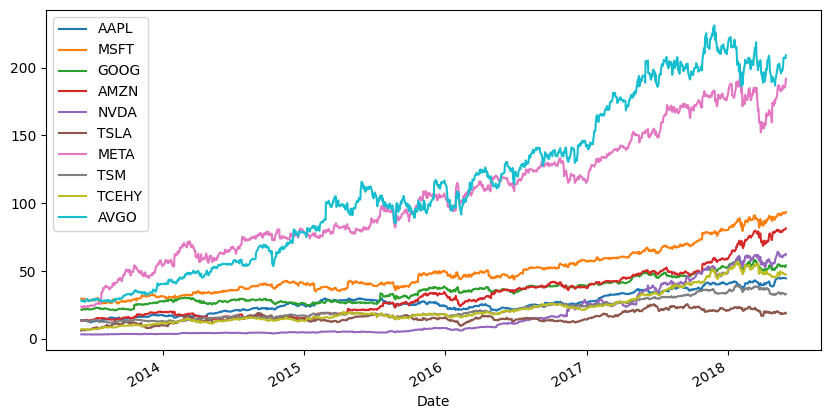

In [76]:
# See the price chart of all the stocks
show_data(stock_train)

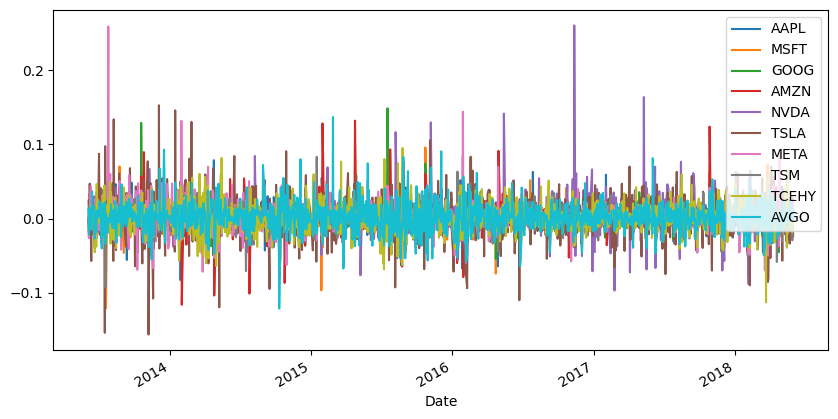

In [77]:
# Calculate returns

#Normalization of returns
log_return_train = np.log(stock_train/stock_train.shift(1))
log_return_train = log_return_train[1:]

show_data(log_return_train)

<Axes: ylabel='Frequency'>

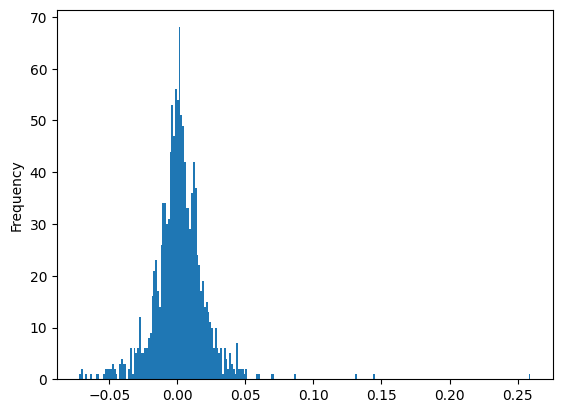

In [28]:
log_return['META'].plot(kind='hist', bins=250)

In [30]:
# We find the mean annual returns and well as covariance of stock returns.
# covariance shows how each stocks returns is moving in relation to the other.
returns_annual_train = log_return_train.mean() * NUM_TRADING_DAYS
cov_annual_train = log_return_train.cov() * NUM_TRADING_DAYS

print(f'Mean Annual Returns --{returns_annual_train}')
print(f'\n Annual Covariance -- {cov_annual_train}')

Mean Annual Returns --AAPL     0.232665
MSFT     0.229976
GOOG     0.184382
AMZN     0.362436
NVDA     0.584688
TSLA     0.225029
META     0.417576
TSM      0.175628
TCEHY    0.376654
AVGO     0.401414
dtype: float64

 Annual Covariance --            AAPL      MSFT      GOOG      AMZN      NVDA      TSLA      META  \
AAPL   0.052726  0.021828  0.020255  0.021854  0.026742  0.024544  0.023917   
MSFT   0.021828  0.053258  0.028232  0.029042  0.032419  0.025713  0.026083   
GOOG   0.020255  0.028232  0.050876  0.037371  0.028681  0.029702  0.035978   
AMZN   0.021854  0.029042  0.037371  0.084026  0.030271  0.042036  0.042079   
NVDA   0.026742  0.032419  0.028681  0.030271  0.126329  0.039645  0.032627   
TSLA   0.024544  0.025713  0.029702  0.042036  0.039645  0.195318  0.046375   
META   0.023917  0.026083  0.035978  0.042079  0.032627  0.046375  0.097296   
TSM    0.020588  0.020706  0.020472  0.019419  0.029722  0.023966  0.019082   
TCEHY  0.022817  0.023161  0.025882  0.028057  0.

In [65]:
# Generate random weights for each stock totalling to 1 and generate 10,000 portfolios

def generate_portfolios(returns):
  portfolio_means = []
  portfolio_risks = []
  portfolio_weights = []

  for _ in range(NUM_PORTFOLIOS): # n - number of stocks in portfolio
    # Create Random Weights
    w = np.random.random(4)
    # Rebalance Weights
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_means.append(np.sum(returns.mean() * w) * NUM_TRADING_DAYS)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov()
                                                      * NUM_TRADING_DAYS, w))))

  return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)



In [79]:
def show_portfolios(returns, volatilities):
  #plt.figure(figsize=(10, 6))
  plt.scatter(volatilities, returns, c=returns / volatilities, marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.show()

In [81]:
ret_folio_1 = log_return_train[['MSFT', 'AAPL', 'GOOG', 'AMZN']]
#print(ret_folio_1)
weights, means, risks = generate_portfolios(ret_folio_1)
len(means)

10000

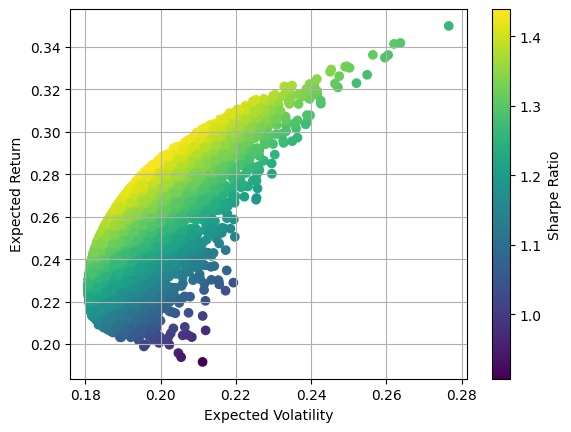

In [82]:
show_portfolios(means, risks)

In [85]:
#portfolio_return = np.sum(ret_folio_1.mean() * weights) * NUM_TRADING_DAYS
ret_folio_1.mean()*weights

ValueError: ignored

In [68]:
# what are the constraints? The sum of weights = 1 !!!
# the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# the weights can be 1 at most: 1 when 100% of money is invested into a single stock
bounds = tuple((0, 1) for _ in range(4))

# f(x)=0 this is the function to minimize
optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns
                              , method='SLSQP', bounds=bounds, constraints=constraints)


((0, 1), (0, 1), (0, 1), (0, 1))

In [69]:
portfolio_return = np.sum(ret_folio_1.mean() * weights) * NUM_TRADING_DAYS
portfolio_return

ValueError: ignored